# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

In [33]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by examining the implementation of an actual neural network.
I have implemented a very simple `sequential` model to classify handwritten digits from the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) data set.  Follow the code closely.  Make sure you understand it.  Use Keras documentation e.g. [First contact with Keras](https://keras.io/about/), [Dense Layer](https://keras.io/api/layers/core_layers/dense/), [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/).

In [34]:
#download the dataset
(x, y), _ = tensorflow.keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = tensorflow.keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

>In the following code cell, I construct the model.  Answer the following questions:
>1. How many layers does the network have?
>2. How many neurons in each layer ?
>3. Why is the input dimension 784?
>4. How many weights are there between each layer? (_Hint_: verify with ``model.summary()`` below). Explain how to get these numbers.

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(20, input_dim=784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])


In [ ]:
# let's see what the model "looks" like
model.summary()

In [ ]:
# fit the model to the training data
H = model.fit(x_train, y_train, epochs=5, batch_size=128)

In [ ]:
# evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=100)
print(score[0])
print(score[1])

>What kind of scores did you obtain?  What do score[0] and score[1] represent?  

>How could the accuracy be improved?
>1. First try to improve the performance by retraining the model for a longer time (i.e., higher number of epochs).  How much does the accuracy improve?
2. Then try to change the architecture of the network.  For example add more neurons to the exisiting layers; also add another layer of neurons.  Refit the data.  Does the performance increase?
3. **BONUS**. Can you score over 90% accuracy in just five training epochs? (Wait with this exercise, come back to this question when you're done with all the exercises)

> **Ex. 3.1.2** Solve exercises 1.2.2 and 1.2.3 from week 1 (producing the same result plots), but solve them using Keras.
> Comment on differences in speed and outcome if you observe any.

### Part 3.2: Overfitting and regularization

A model *overfitting* means that it treats what is essentially noise in the data, as important predictive features, or that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new (unseen) data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we will intentionally overfit some data! Let's fit a neural network to the following data.  

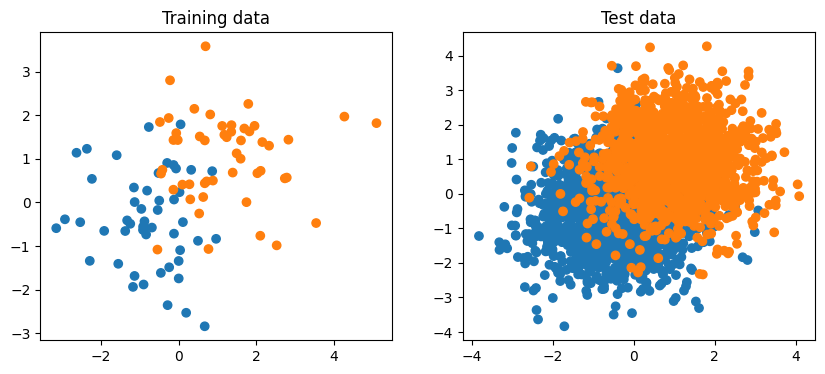

In [26]:
#code given in week1 exercise 1.2.2, slightly modified to have some crossover points

np.random.seed(2)
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-0.5, -0.5], 1, size=(int(N/2), 2)),
        np.random.normal([1, 1], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

ntr=100
nts=3e3
x_train, y_train = generate_X_linear(N=ntr)
x_test, y_test = generate_X_linear(N=nts)

fig,ax = plt.subplots(1,2, figsize=[10,4])
ax[0].scatter(x_train[:,0],x_train[:,1],color=['C'+str(i) for i in y_train.ravel()])
ax[1].scatter(x_test[:,0],x_test[:,1],color=['C'+str(i) for i in y_test.ravel()])
ax[0].set_title('Training data'); ax[1].set_title('Test data');

> The *theoretical optimal decision boundary* to separate two gaussian point clouds (no matter how close the centers are) is a *straight line*, and since the clusters are overlapping it is natural that there will be some error when fitting the model to the data. Nevertheless, try to reduce the error to 0 (accuracy = 1) by adding layers of ``overfitter.add(Dense(200, activation = 'relu'))`` to the code below

In [ ]:
import keras
overfitter = Sequential()
overfitter.add(Dense(200, input_dim=2, activation = 'relu'))
overfitter.add(Dense(1, activation='sigmoid'))

overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

# fit the model to the training data
history = overfitter.fit(x_train, y_train, epochs=300, batch_size=128, validation_data = (x_test, y_test))

> When you get acc=1, plot the test data and colour it using the predictions of your neural network

In [ ]:
pred_class = overfitter.predict(x_test) > 0.5 # what does this line do?
fig,ax = plt.subplots(1, 1, figsize=[5,5])
ax.scatter(x_test[:,0], x_test[:,1], c=pred_class)

> Now plot the training and test loss as a function of number of epochs

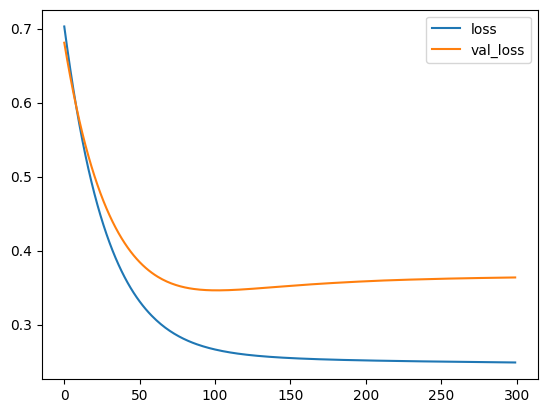

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

> Finally, use different types of regularization to avoid overfitting:
> - For each technique, provide a working code sample (Remember, all results shall be available when running the notebook as a whole. Make sure this is possible.),
> - For each technique, plot the training and test loss as a function of number of epochs as you did above.
>
> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it cannot overfit. Read about regularization in Keras here: [Layer Weight Regularizers](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/). When you add a new layer to your model, one of the parameters is `kernel_regularizer` -- this allows you to select a regularization technique (`l2` in our case), together with a hyperparameter for the regularization.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore) and a more complete explanation [here](https://keras.io/api/callbacks/early_stopping/).

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/api/layers/regularization_layers/dropout/).

> **Ex 3.2.5** More data: The most important thing when training a machine learning model is getting enough data. Oftentimes, having enough data is all the regularization you need: The training phase is updating the weights to makes the cost function smaller, but the cost function now tries to make the network good at predicting on many different data-points. This leads to the network having to come up with more generalizable prediction rules (and generalization is opposite of overfitting).
>
> Change `ntr` from `100` to `1000` in the code that generates the data and run the `overfitter` model that you got to overfit on the smaller dataset of 100 datapoints; what happens?

> **Ex 3.2.6** Comparison: Compare the different types of regularization and express your ideas on how you would use them for a project.